In [1]:
import pyvista as pv
import numpy as np
from PIL import Image

In [2]:
def faces_to_pyvista(faces):
    # converts faces array to pyvista type for visualization
    return np.hstack((np.full((faces.shape[0], 1), 3), faces))

# "Exact" mesh sampling
These tools perform sampling on the mesh by sampling points on the faces and adding them as vertices to the mesh. See below for an approach that samples the vertices without editing the original mesh.

## Poisson sampling

In [3]:
from mesh_poisson_disk_sampling import poisson_disk_sampling

In [ ]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

mesh = trimesh.Trimesh(vertices, faces)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

In [ ]:
# this is not super efficient, it may take a while for large meshes
# based on your hardware, this can take up to 10 minutes

# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = poisson_disk_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 1000, verbose = True)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

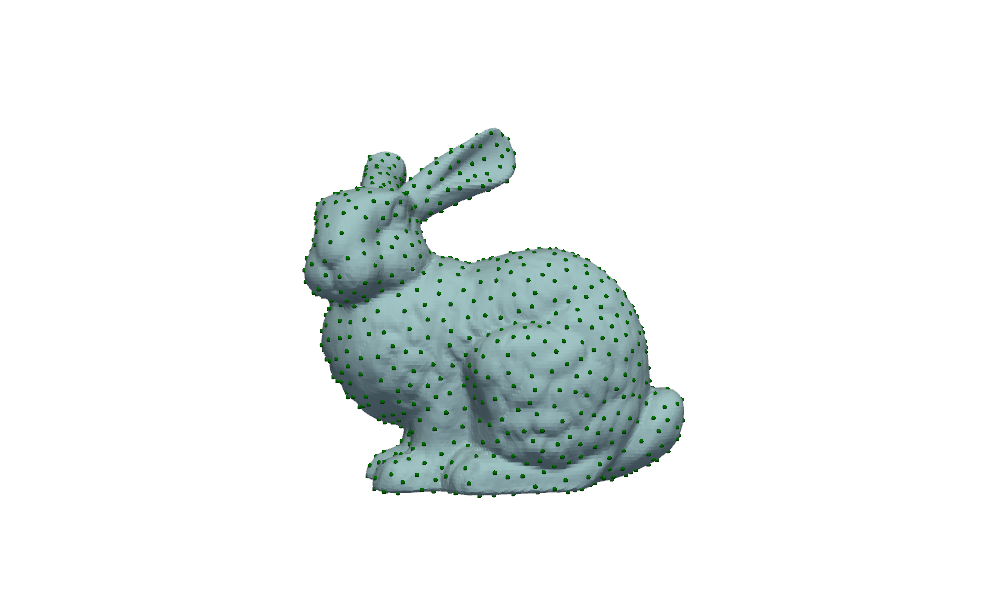

In [2]:
# this is what it looks like
Image.open('images/bunny_poisson.png')

## Uniform sampling

In [7]:
from mesh_poisson_disk_sampling import uniform_sampling

In [40]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

mesh = trimesh.Trimesh(vertices, faces)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

In [9]:
# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = uniform_sampling(vertices, faces, num_points = 1000)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

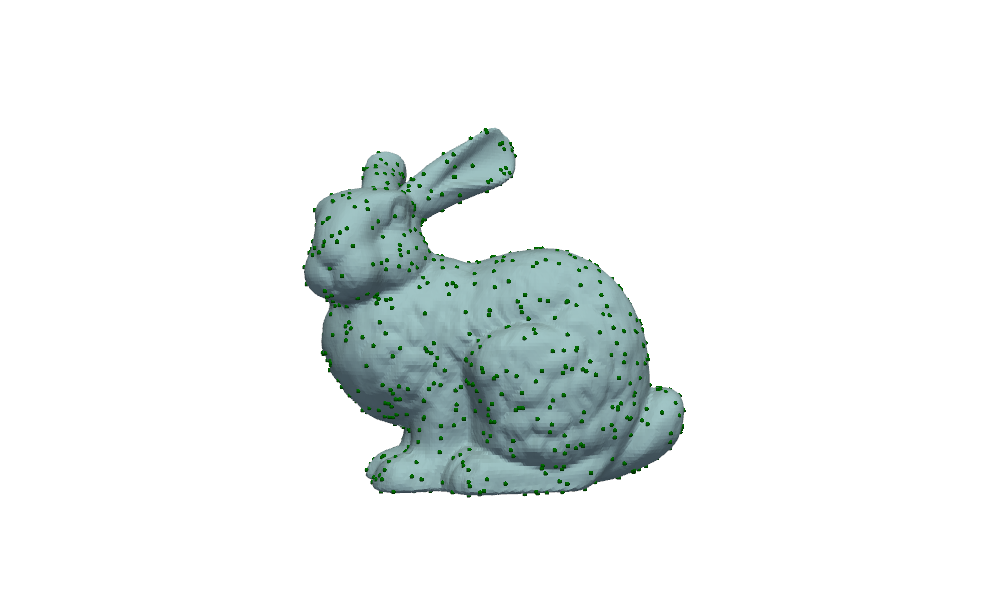

In [3]:
# this is what it looks like
Image.open('images/bunny_uniform.png')

## Geodesic vs edge distance
We can perform poisson sampling using either the exact geodesic distance, or the approximate edge distance. When the mesh is really fine, the two are very similar, but they may differ substantially in other contexts.

At the moment the edge distance computation is horribly inefficient, so just don't use it.

### Edge distance

In [5]:
from mesh_poisson_disk_sampling import edge_distance_poisson_disk_sampling

In [5]:
# load an example mesh
mesh = pv.examples.download_bunny_coarse()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

mesh = trimesh.Trimesh(vertices, faces)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

In [ ]:
# this is not efficient at all, it takes a while even for small meshes
# based on your hardware, this can take up to 10 minutes

# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = edge_distance_poisson_disk_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 100, verbose = True)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

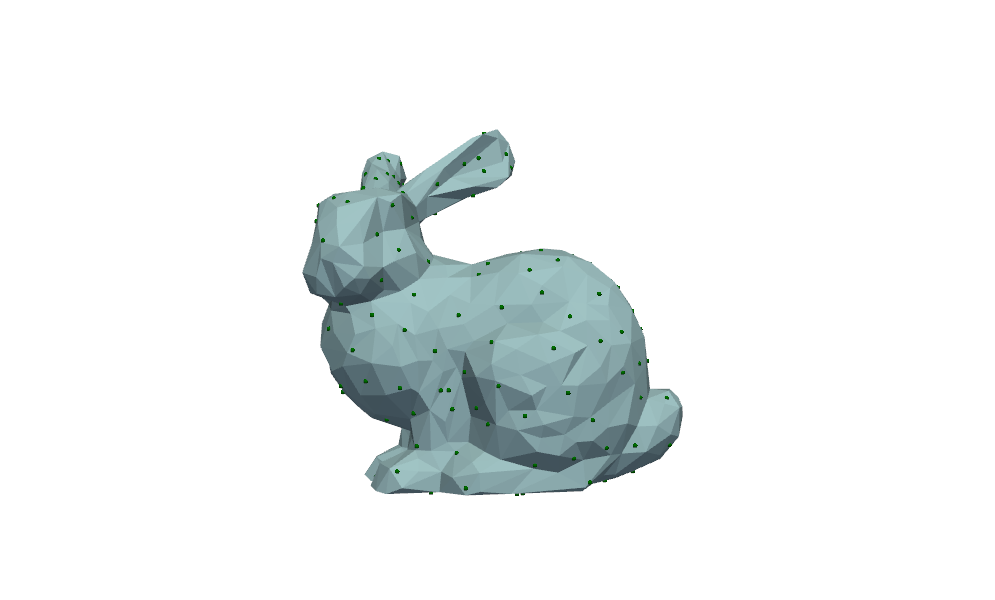

In [8]:
# this is what it looks like
Image.open('images/coarse_bunny_poisson_edgedist.png')

### Geodesic distance

In [ ]:
from mesh_poisson_disk_sampling import poisson_disk_sampling

In [9]:
# load an example mesh
mesh = pv.examples.download_bunny_coarse()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

mesh = trimesh.Trimesh(vertices, faces)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

In [ ]:
# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = poisson_disk_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 100, verbose = True)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

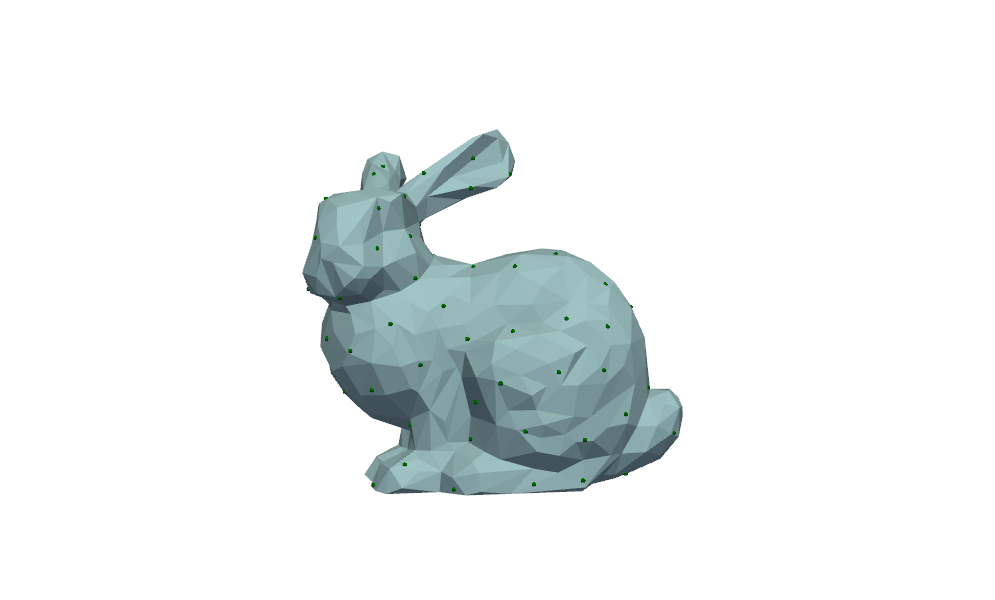

In [12]:
# this is what it looks like
Image.open('images/coarse_bunny_poisson.png')

# Vertex sampling
We can perform either "exact" in-face sampling, or we can sample vertices of the existing mesh. The two approaches are equivalent in the limit of infinite triangles, in practice if the average distance between points in the final sampling is much larger than the typical length of the triangles, this approach should be good enough.

Since it does not add points to the mesh, it is a bit faster and more convenient in some cases.

## Poisson sampling

In [ ]:
from mesh_poisson_disk_sampling import poisson_disk_vertex_sampling

In [ ]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

mesh = trimesh.Trimesh(vertices, faces)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

In [ ]:
# this is not super efficient, it may take a while for large meshes
# based on your hardware, this can take up to 10 minutes

# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = poisson_disk_vertex_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 1000, verbose = True)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

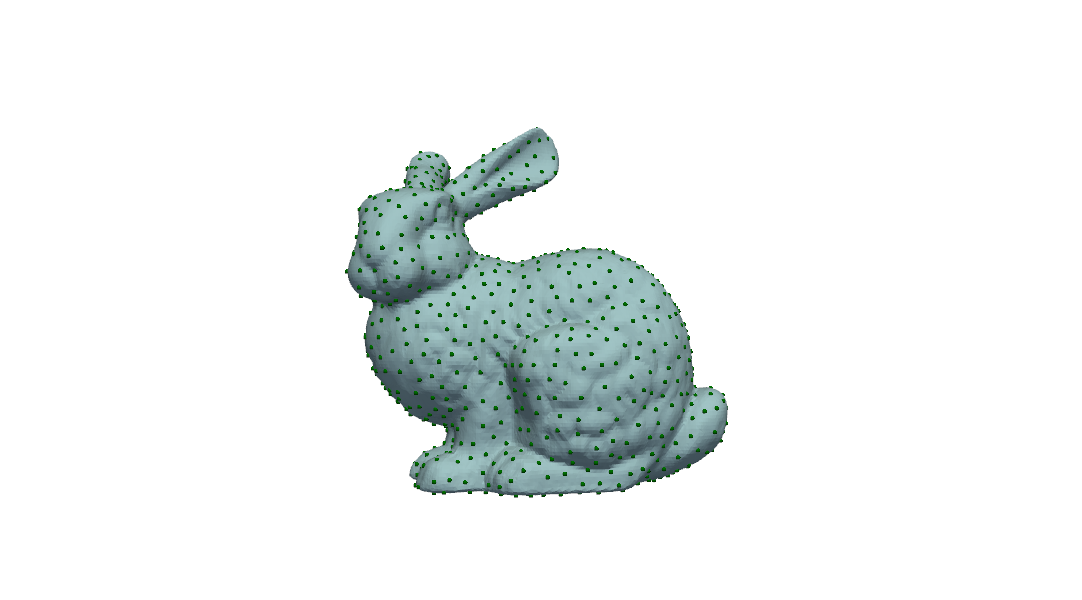

In [57]:
# this is what it looks like
Image.open('images/bunny_poisson_vertex.png')

## Uniform sampling

In [ ]:
from mesh_poisson_disk_sampling import uniform_vertex_sampling

In [58]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

mesh = trimesh.Trimesh(vertices, faces)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

In [59]:
# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = uniform_vertex_sampling(vertices, faces, num_points = 1000)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

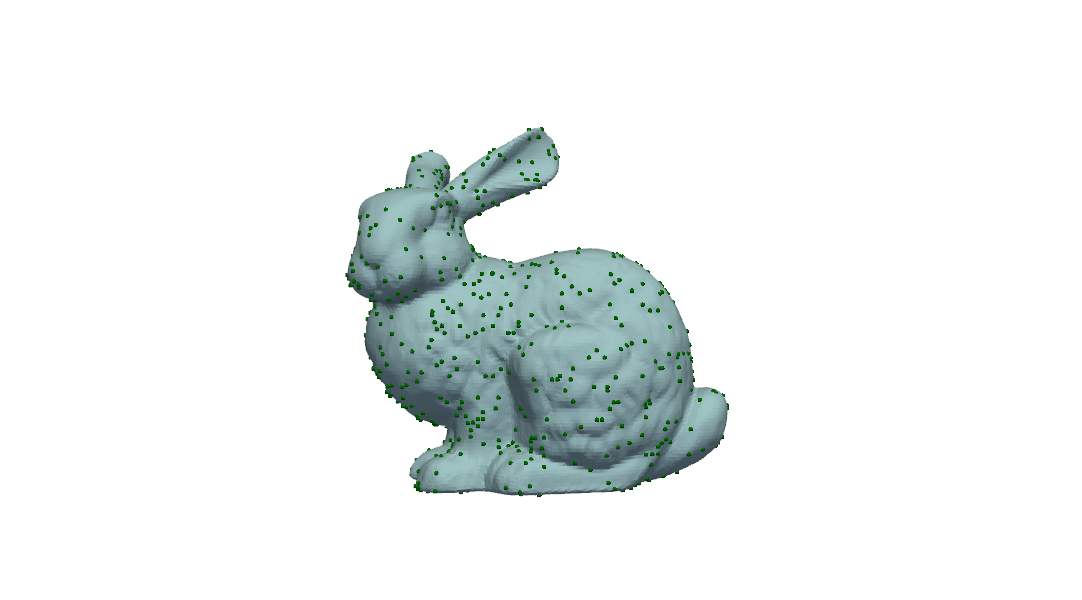

In [61]:
# this is what it looks like
Image.open('images/bunny_uniform_vertex.png')

## Geodesic vs edge distance
We can perform poisson sampling using either the exact geodesic distance, or the approximate edge distance. When the mesh is really fine, the two are very similar, but they may differ substantially in other contexts.

At the moment the edge distance computation is horribly inefficient, so just don't use it.

### Edge distance

In [ ]:
from mesh_poisson_disk_sampling import edge_distance_poisson_disk_vertex_sampling

In [67]:
# load an example mesh
mesh = pv.examples.download_bunny_coarse()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

mesh = trimesh.Trimesh(vertices, faces)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

In [68]:
# this is not efficient at all, it takes a while even for small meshes

# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = edge_distance_poisson_disk_vertex_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 100, verbose = True)

Sampling about 100 points with an estimated minimum distance of 0.03395145113974597
Number of points sampled in each disk: 30
Mesh is fine enough, with a coefficient of 0.7619525445828398
Starting sampling with vertex: 465, with coordinates [ 0.08132757 -0.11827224 -0.04204581]


Iteration 121: : 120it [00:39,  3.04it/s]                            


In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

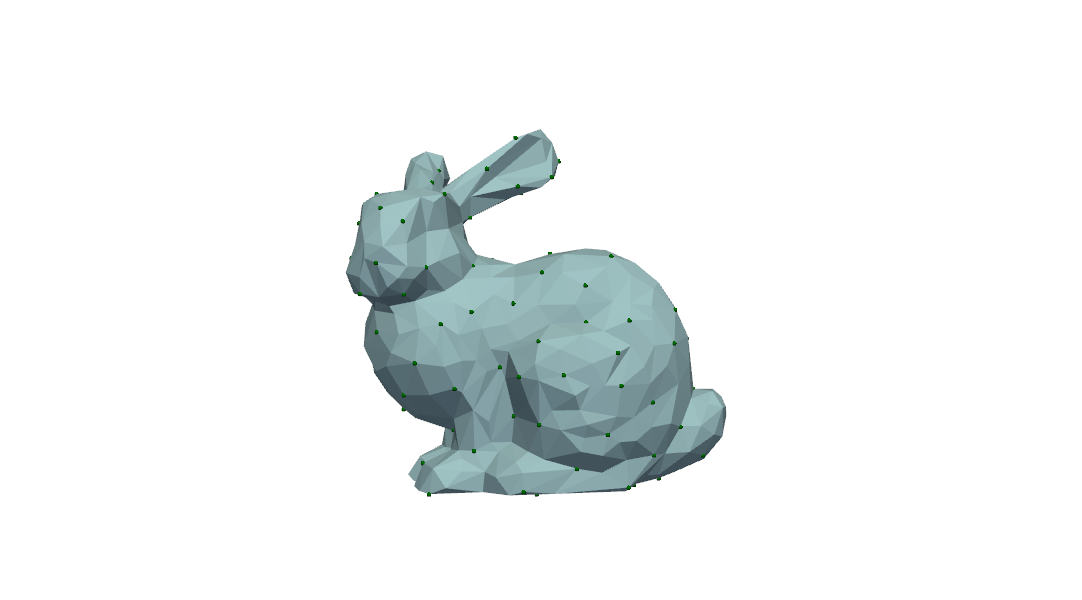

In [70]:
# this is what it looks like
Image.open('images/coarse_bunny_poisson_edgedist_vertex.png')

### Geodesic distance

In [ ]:
from mesh_poisson_disk_sampling import poisson_disk_vertex_sampling

In [62]:
# load an example mesh
mesh = pv.examples.download_bunny_coarse()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

mesh = trimesh.Trimesh(vertices, faces)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

In [63]:
# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = poisson_disk_vertex_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 100, verbose = True)

Sampling about 100 points with an estimated minimum distance of 0.03395145113974597
Number of points sampled in each disk: 30
Mesh is fine enough, with a coefficient of 0.7619525445828398
Starting sampling with vertex: 174, with coordinates [ 0.07297887 -0.03136574  0.09238279]


Iteration 100:  99%|█████████▉| 99/100 [00:05<00:00, 16.81it/s]      


In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

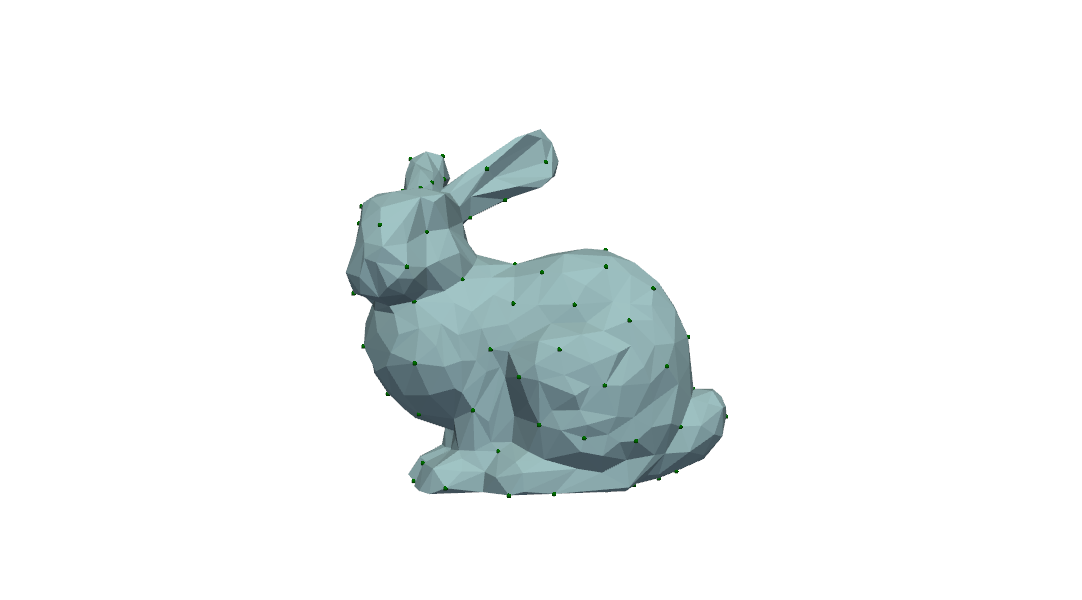

In [65]:
# this is what it looks like
Image.open('images/coarse_bunny_poisson_vertex.png')